Fecha límite de entrega: **Jueves 28 de agosto** antes de las 11am.

[1] Escribe una función recursiva para calcular una raiz de una función $f$ en un intervalo $[a,b]$ con el método de bisección. Verifica que funcione al calcular raices de distintas funciones.

In [9]:
### Solución para (1)
### Supondremos que f(a) tiene el signo opuesto a f(b) como condición inicial

### Esta función acepta la función a evaluar (f), los límites de búsqueda (a y b) tales 
### que el signo de f(a) es opuesto al de f(b) y n (100 por defecto) es el límite de recursión
function find_root_bisection(f, a, b, n=300)
    c = (a+b)/2
    
    ### Checamos que no rebasamos el límite de recusrsión
    if n == 0 
        return c;
    end
    
    medio = f(c);
    
    ### Sería extraño, pero es posible que encontremos el cero así
    if medio == 0
        return c;
    end
    
    ### Si el valor en c es signo-opuesto al valor en a, entonces (a,c) es el siguiente intervalo
    if medio/abs(medio) ==-f(a)/abs(f(a))
        return find_root_bisection(f, a, c, n-1);
    else ### Si no, entonces es el otro intervalo
        return find_root_bisection(f, c, b, n-1);
    end
end

### Unas pruebas rápidas

# 1. Raiz cuadrada de 2: funciona
println(find_root_bisection(x -> x^2-2, 1, 2) - sqrt(2))

# 2. Raiz de coseno: funciona (los valores límite son un poco 
# raros para evitar que converga directamente)
println(find_root_bisection(x -> cos(x), π/4.21, 3π/4.32) - π/2)

# 3. Raiz de logaritmo
println(find_root_bisection(x -> log(x), 0.67, 1.45) - 1)

-2.220446049250313e-16
0.0
0.0


[2] Considera la colisión en una dimensión de una partícula haciendo movimiento armónico simple con frecuencia angular $\omega$ y una partícula libre con velocidad $v$. 

(a) Escribe una función que toma los parámetros del oscilador y de la partícula y grafica sus respectivas posiciones en el tiempo, suponiendo que no hay colisión. 

In [12]:
using PyPlot;


(.:9222): Gtk-WARNING **: Theme parsing error: gtk.css:3:11: Not using units is deprecated. Assuming 'px'.
INFO: Loading help data...


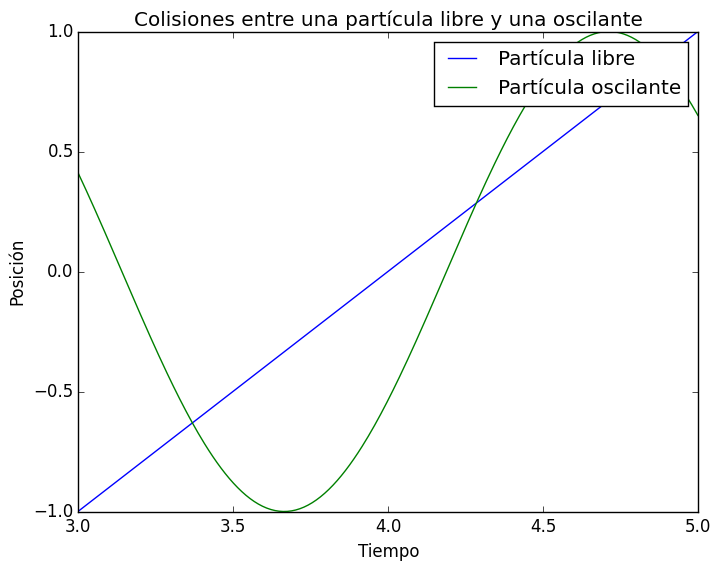

In [26]:
### Solución para 2.a

### Sin pérdida de generalidad, asumiremos que la partícula oscilante oscila alrededor de 0 y es descrita 
### por A*sin(ωt). No tenemos que considerar su fase tampoco ya que este desplazamiento temporal 
### se puede incluir en la descripción de la partícula libre

### Esta función toma la posición inicial de la partícula libre x0, su velocidad v, la 
### amplitud de oscilaciones del oscilador A, y su frecuencia ω y grafica sus trayectorias
function plot_tracks(x0, v, A, ω)
    ### Primero encontraremos los tiempos cuando la partícula libre estará en
    ### la región del oscilador
    t_a = (-A - x0)/v;
    t_b = (A - x0)/v;
    
    ### Generamos el rango de valores para graficar
    tr = linspace(t_a, t_b, 300)
    
    plot(tr, [x0 + v*t for t in tr], label="Partícula libre");
    plot(tr, [A*sin(ω*t) for t in tr], label="Partícula oscilante");
    legend();
    xlabel("Tiempo");
    ylabel("Posición");
    title("Colisiones entre una partícula libre y una oscilante")
end;

plot_tracks(-4, 1, 1, 3);

(b) Dibuja (en gráficas separadas) las trayectorias de las dos partículas para unas cuantas posibilidades de los parámetros. ¿Cuántas "colisiones" puede haber? ¿Cuál es la buena?

(c) Escribe una función para calcular el tiempo de colisión de las dos partículas, sin garantizar cuál es, utilizando la función que escribiste en la pregunta [1].

**[Opcional] (d) ¿Cómo puedes garantizar que se encuentre la colisión adecuada? Impleméntalo.

[2] Implementa el método de Newton para calcular una raiz de una función $f$, dadas una adivinanza inicial $x_0$ y la derivada $f'$ (que por el momento se implementa a mano en otra función).

(a) Verifica que tu función sirve para encontrar raices de la función $f(x) = x^2 - 2$. 

(b) Intenta con distintos valores iniciales. Dibuja una gráfica que muestra a cuál raiz llega el método para distintos valores iniciales.

(c) Usa el método de Newton para encontrar las soluciones de la ecuación 
$$ \tan(x) = x. $$

Nota: Es posible que la iteración de Newton *no converja*. En este caso, conviene poner un número máximo de iterados como otro argumento de la función.

[3] (a) Escribe una función que verifica si un número entero es un número primo o no. Puedes utilizar bucles.

(b) Dibuja una gráfica que muestra el número de primos menor que $n$ como función de $n$.